# FlakyPipeline

## Business Understanding
Un flaky test è un'analisi del codice che non riesce a produrre lo stesso risultato ogni volta che viene eseguita la stessa analisi. Ogni volta che viene scritto un nuovo codice per sviluppare o aggiornare software, una pagina Web o un'app, deve essere testato durante tutto il processo di sviluppo per assicurarsi che l'applicazione faccia ciò che dovrebbe fare quando viene rilasciata per l'uso. Logicamente, quando viene sottoposto allo stesso test più e più volte, il codice produrrà lo stesso risultato: l'applicazione funzionerà correttamente ogni volta, superando così il test, o non funzionerà correttamente ogni volta, fallendo così il test.

Tuttavia, apparentemente a caso, occasionalmente lo stesso test dello stesso codice produrrà risultati diversi. A volte mostrerà che il codice ha superato il test e l'applicazione ha funzionato come pianificato, e talvolta mostrerà che il codice non ha superato il test e non ha funzionato come previsto. Quando succede questo, il test è considerato flaky.

I flaky possono essere causati da vari fattori:
1. un problema con il codice appena scritto
2. un problema con il test stesso
3. alcuni fattori esterni che compromettono i risultati del test

Non è sempre facile individuare tali testi, può capitare che eseguiamo un test 10000 volte ed avremo sempre lo stesso risultato, ma se eseguissimo il test un ulteriore volta avremo un risultato diverso. Lo scopo di "FlakyPipeline" e di utilizzare il machine learnig per determinare se un test può essere considerato flaky oppure no.

## Data Understanding


In [1]:
import pandas
import os

DATASET_NAME='flakeFlagger.csv'

def loadingDataSet(datasetname):
    current_directory=os.getcwd()
    csv_path = os.path.join(current_directory, datasetname)
    return pandas.read_csv(csv_path)


dataset=loadingDataSet(DATASET_NAME)
dataset.head()


,id,nameProject,testCase,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,...,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode,isFlaky
0,36,alluxio,tachyon.userinfotest.constructortest,0.025907,0.125,0.093176,0.021277,0.000000,0.023810,0.0,...,0.013619,0.007587,0.030129,0.017451,0.0,0.000000,0.0,0.046144,0.000000,False
1,2,alluxio,tachyon.masterclienttest.openclosetest,0.062176,0.125,0.473047,0.085106,0.166667,0.142857,0.0,...,0.377432,0.226801,0.178862,0.162119,0.0,0.391081,0.0,0.046144,0.057664,True
2,5,alluxio,tachyon.workerservicehandlertest.overcapacityr...,0.015544,0.125,0.419291,0.042553,0.000000,0.023810,0.0,...,0.025292,0.013019,0.034912,0.022138,0.0,0.000000,0.0,0.046144,0.000000,True
3,6,alluxio,tachyon.workerservicehandlertest.totalovercapa...,0.025907,0.125,0.652231,0.085106,0.000000,0.023810,0.0,...,0.025292,0.013019,0.034912,0.022138,0.0,0.000000,0.0,0.046144,0.000000,True
4,7,alluxio,tachyon.workerservicehandlertest.returnspacetest,0.036269,0.250,0.489173,0.085106,0.000000,0.047619,0.0,...,0.025292,0.013019,0.034912,0.022138,0.0,0.000000,0.0,0.046144,0.000000,True


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9785 entries, 0 to 9784
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        9785 non-null   int64  
 1   nameProject               9785 non-null   object 
 2   testCase                  9785 non-null   object 
 3   tloc                      9785 non-null   float64
 4   tmcCabe                   9785 non-null   float64
 5   assertionDensity          9785 non-null   float64
 6   assertionRoulette         9785 non-null   float64
 7   mysteryGuest              9785 non-null   float64
 8   eagerTest                 9785 non-null   float64
 9   sensitiveEquality         9785 non-null   float64
 10  resourceOptimism          9785 non-null   float64
 11  conditionalTestLogic      9785 non-null   float64
 12  fireAndForget             9785 non-null   float64
 13  loc                       9785 non-null   float64
 14  lcom2   


| Features | Descrizione |
| --- | --- | 
| Id ||
| NameProject | |
| TestCase | |
| tloc | Numero di righe di codice della test suit |
| tmcCabe | Somma delle complessità ciclomatiche di tutti i metodi di una classe |
| assertionDensity | Percentuali di asserzioni presenti nella test suit |
| assertionRoulette | Metrica che indica se il test ha più di una asserzione non documentata |
| mysteryGuest | Metrica che indica se il test utilizza una risorsa esterna (es: database,file ...) |
| eagerTest | Metricha che indica se un test invoca diversi metodi dell'oggetto di produzione.|
| sensitiveEquality | Indica se il metodo toString e utilizzado nel test|
| resourceOptimism | Metodo che fa assunzioni ottimistiche sull'esistenza di una risorsa (es file) utilizzata all'interno di esso |
| conditionalTestLogic ||
| fireAndForget | Test che termina prematuramente in quanto non aspetta le risposte delle chiamate esterne |
| loc | line di codice comprendendo anche i commenti | 
| locm2 |  | 
| locm5 |  |
| cbo | Numero di dipendenze di una classe con altre classi |
| wmc | Somma delle complessità ciclomatiche di tutti i metodi di una classe | 
| rfc | Numero di metodi (compresi quelli ereditari) che possono essere chiamati da altre classi |
| mpc |  |
| halsteadVocabulary | Gaussian |
| halsteadLength | Numero totale di operatori e operandi distinti un una funzione |
| halsteadVolume | Memoria (in bit) necessaria per memorizzare il programma |
| classDataShouldBePrivate | Classe che espone i suoi attributi, violando il principio dell'information hiding. |
| complexClass | Complessita ciclomatica di una classe, ovvero il numero di cammini linearmente indipendeti all'interno della classe|
| functionalDecomposition | Metrica che indica se in una classe ereditarietà e polimorfismo sono utilizzate in modo sbagliato. |
| godClass | Classe di grandi dimensioni che implementa diverse responsabilità |
| spaghettiCode | Classe non possiedie una struttura coerente ad esempio un metodo eccessivamente lungo che non possiede parametri |
| isFlaky | Booleano che indica se il test è flaky oppure no |

In [3]:
dataset.describe(include='all')

,id,nameProject,testCase,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,...,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode,isFlaky
count,9785.000000,9785,9785,9785.000000,9785.000000,9785.000000,9785.000000,9785.000000,9785.000000,9785.000000,...,9785.000000,9785.000000,9785.000000,9785.000000,9785.000000,9785.000000,9785.000000,9785.000000,9785.000000,9785
unique,NaN,18,9342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,incubator-dubbo,controllers.loginlogoutcontrollertest.testlogi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1681,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9115
mean,7127.771794,NaN,NaN,0.048908,0.144047,0.073269,0.028109,0.013132,0.036944,0.006711,...,0.072381,0.048549,0.109700,0.087641,0.008233,0.022893,0.067195,0.046236,0.021554,NaN
std,3992.321303,NaN,NaN,0.054223,0.114475,0.115873,0.054004,0.063745,0.058367,0.043813,...,0.134192,0.081089,0.147238,0.140299,0.053316,0.138874,0.235054,0.009654,0.127027,NaN
min,2.000000,NaN,NaN,0.005181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4275.000000,NaN,NaN,0.020725,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.008754,0.032520,0.019027,0.000000,0.000000,0.000000,0.046144,0.000000,NaN
50%,7227.000000,NaN,NaN,0.031088,0.125000,0.000000,0.021277,0.000000,0.023810,0.000000,...,0.027237,0.021639,0.064562,0.042651,0.000000,0.000000,0.000000,0.046144,0.000000,NaN
75%,10398.000000,NaN,NaN,0.056995,0.250000,0.111811,0.021277,0.000000,0.047619,0.000000,...,0.077821,0.055937,0.123386,0.090445,0.000000,0.000000,0.000000,0.046144,0.000000,NaN


Il dataset da utlizzare non possiede valori nulli, pertando non sara necessario eseguire operazioni di "Data Cleaning" tuttavia, risulta essere sbilanciato in quanto sono presenti 9115/9785 campioni di test la cui label isFlaky e False.

## Data Preparation


### Partizionamento DataSet
Prima di manipolare il dataset, in modo da ottimizzare l'estrazione di un modello predittivo, esso verra diviso in train-set(80%) e test-set(20%).
Il tain-set sarà utlizzato per l'identificazione di un modello predittivo, mentre il test-set verrà utilizzato per testare l'algoritmo di machine learnin.
Per il partizionamento del dataset si puo adottare un  partizionamento random oppure un campionamento statificato, ma essendo il dataset abbastanza piccolo e sbilanciato si e deciso di utilizzare il secondo metodo.
Il campiomanento viene effettuato sull attributo 'isFlaky', in modo da mantenere le stesse proporzioni per i valori del attributo del dataset di partenza.



In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index_stratified,test_index_stratified in split.split(dataset,dataset['isFlaky']):
    train_set=dataset.loc[train_index_stratified]
    test_set=dataset.loc[test_index_stratified]

print("Dimensione Train-set ",len(train_set))
print("Dimensione Test-set ",len(test_set))
print("Proporzioni attributo isFlaky dataset di partenza:\n ")
dataset['isFlaky'].value_counts()/len(dataset)


Dimensione Train-set  7828
Dimensione Test-set  1957
Proporzioni attributo isFlaky dataset di partenza:
 


False    0.931528
True     0.068472
Name: isFlaky, dtype: float64

In [5]:
print("Proporzioni attributo isFlaky test-set:\n ")
test_set['isFlaky'].value_counts()/len(test_set)

Proporzioni attributo isFlaky test-set:
 


False    0.931528
True     0.068472
Name: isFlaky, dtype: float64

### Preparazione dei dati per l'estrazione di un modello
In tale fase andre ad effettuare delle trasformazioni sul test-set in modo da ottimizzare l'estrazione di un modello predittivo.
La prima operazione che si dovrebbe effettuare e quella del "Data Cleaning". In alcuni casi quando si raccolgono i dati per creare un data set, non si riesce sempre a ricavare tutti gli attributi per un determinato campione, in tal caso esso presentera dei valori null. Tali valori sono un problema per gli algoritmi di machine learning, pertanto devono essere risolti.
Nel nostro caso possiamo saltare tale passaggio in quanto da come si evince nella decrizione del dataset non sono presenti valori mancanti.
Il passo successivo e quello della "Feature Construction". In tale fase si andremo a manipolare le caratteristiche rendendole piu efficienti per un compito di data maining.
In tale fase eseguiremo una riduzione della dimensionalita, ovvero cercheremo di ridurre le caratteristiche cercando di mantenere queante piu informazioni possibili.
La tecnica che viene applicata e la PCA (Analisi delle componenti principali).

Tuttavia la PCA risulta esser più efficiente su dati standardizzati. Per tale motivo verra eseguita prima la standardizzazione.
#### Standardizzazione
![](Standardizzazione.jpg)

In [6]:
from sklearn.preprocessing import StandardScaler
train_dataset=train_set.drop(['id','nameProject','testCase','isFlaky'],axis=1)
train_dataset_lable=train_set['isFlaky']

#Standardizzo il dataset
sc=StandardScaler()
X_train_dataset=sc.fit_transform(train_dataset)
print('Train-Set Non Standardizzato')
train_dataset.head()

Train-Set Non Standardizzato


,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,resourceOptimism,conditionalTestLogic,fireAndForget,...,rfc,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode
3199,0.031088,0.125,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.02381,0.0,...,0.004886,0.000000,0.002694,0.018651,0.009008,0.0,0.0,0.0,0.046144,0.0
8425,0.046632,0.000,0.000000,0.000000,0.0,0.047619,0.0,0.0,0.00000,0.0,...,0.065147,0.066148,0.028866,0.094213,0.065515,0.0,0.0,0.0,0.046144,0.0
3509,0.025907,0.125,0.093176,0.042553,0.0,0.071429,0.0,0.0,0.00000,0.0,...,0.022801,0.000000,0.011178,0.047346,0.028766,0.0,0.0,0.0,0.046144,0.0
4988,0.020725,0.000,0.111811,0.042553,0.0,0.023810,0.0,0.0,0.00000,0.0,...,0.071661,0.052529,0.022626,0.063606,0.043060,0.0,0.0,0.0,0.046144,0.0
2759,0.036269,0.125,0.069882,0.000000,0.0,0.000000,0.0,0.0,0.00000,0.0,...,0.003257,0.000000,0.000853,0.004782,0.002092,0.0,0.0,0.0,0.046144,0.0


In [7]:
print('Train-Set Standardizzato')
sc_train_dataset=pandas.DataFrame(X_train_dataset,columns=train_dataset.columns)
sc_train_dataset.head()

Train-Set Standardizzato


,tloc,tmcCabe,assertionDensity,assertionRoulette,mysteryGuest,eagerTest,sensitiveEquality,resourceOptimism,conditionalTestLogic,fireAndForget,...,rfc,mpc,halsteadVocabulary,halsteadLength,halsteadVolume,classDataShouldBePrivate,complexClass,functionalDecomposition,godClass,spaghettiCode
0,-0.327435,-0.164579,-0.626339,-0.518872,-0.208723,-0.624902,-0.157507,-0.116509,0.192097,-0.078422,...,-0.552789,-0.533833,-0.560108,-0.612523,-0.555495,-0.156408,-0.167662,-0.293615,-0.010744,-0.172473
1,-0.041729,-1.268545,-0.626339,-0.518872,-0.208723,0.173097,-0.157507,-0.116509,-0.375993,-0.078422,...,-0.153206,-0.047103,-0.240784,-0.105314,-0.157712,-0.156408,-0.167662,-0.293615,-0.010744,-0.172473
2,-0.422670,-0.164579,0.168013,0.261255,-0.208723,0.572096,-0.157507,-0.116509,-0.375993,-0.078422,...,-0.433994,-0.533833,-0.456588,-0.419912,-0.416407,-0.156408,-0.167662,-0.293615,-0.010744,-0.172473
3,-0.517905,-1.268545,0.326883,0.261255,-0.208723,-0.225903,-0.157507,-0.116509,-0.375993,-0.078422,...,-0.110008,-0.147312,-0.316918,-0.310766,-0.315787,-0.156408,-0.167662,-0.293615,-0.010744,-0.172473
4,-0.232200,-0.164579,-0.030575,-0.518872,-0.208723,-0.624902,-0.157507,-0.116509,-0.375993,-0.078422,...,-0.563589,-0.533833,-0.582565,-0.705618,-0.604174,-0.156408,-0.167662,-0.293615,-0.010744,-0.172473


#### PCA (Principal Component Analysis)


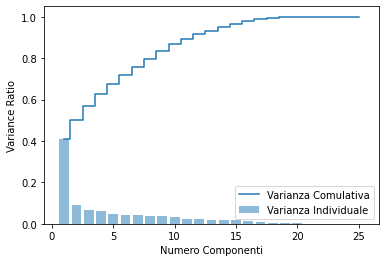

In [8]:
import numpy as np
import matplotlib.pyplot as plt
#Costruisco la matrice di covarianza
cov_mat=np.cov(X_train_dataset.T) #Calcolo la matrice di covarianza del dataset di addestramento standardizzato
#Decompongo la matrice di covarianza in un vettore composto dagli autovalori e i corrispondenti autovalori conservati come colonne in una matrice 25x25

eigen_vals, eigen_vecs=np.linalg.eig(cov_mat)
tot=sum(eigen_vals)
var_exp=[(i/tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp=np.cumsum(var_exp)
plt.bar(range(1,26),var_exp,alpha=0.5,align='center',label='Varianza Individuale')
plt.step(range(1,26),cum_var_exp,where='mid',label='Varianza Comulativa')
plt.ylabel('Variance Ratio')
plt.xlabel('Numero Componenti')
plt.legend(loc='best')
plt.show()

In [9]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
principalCompontent=pca.fit_transform(X_train_dataset)
pca_train_dataset=pandas.DataFrame(principalCompontent,columns=['Principal Component 1','Principal Component 2','Principal Component  3',
                                                                'Principal Component 4','Principal Component 5','Principal Component 6',
                                                                'Principal Component 7','Principal Component 8','Principal Component 9',
                                                                'Principal Component 10'])

print("Varianza:")
pca.explained_variance_ratio_


Varianza:


array([0.4115187 , 0.08925127, 0.06610109, 0.06053231, 0.04641332,
       0.04412632, 0.04010833, 0.03974169, 0.0381224 , 0.03452327])

In [10]:
sum=0
for variance in pca.explained_variance_ratio_:
    sum=variance+sum

print("Varianza totale: ",sum)


Varianza totale:  0.8704387097506602


#### Data Balancing


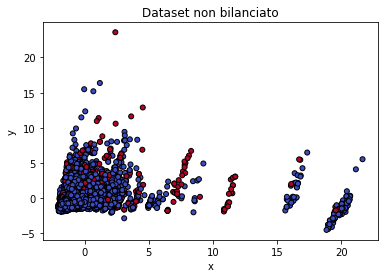

In [11]:
from imblearn.over_sampling import SMOTE
plt.title('Dataset non bilanciato')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(pca_train_dataset.iloc[:, 0], pca_train_dataset.iloc[:, 1], marker='o', c=train_dataset_lable,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

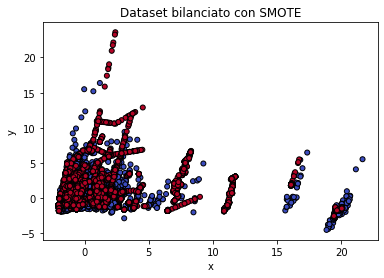

In [12]:
sm=SMOTE(sampling_strategy='auto', k_neighbors=1,random_state=42)
X_train_dataset,Y_train_dataset=sm.fit_resample(pca_train_dataset,train_dataset_lable)

plt.title('Dataset bilanciato con SMOTE')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train_dataset.iloc[:, 0], X_train_dataset.iloc[:, 1], marker='o', c=Y_train_dataset,
           s=25, edgecolor='k', cmap=plt.cm.coolwarm)
plt.show()

## Modeling

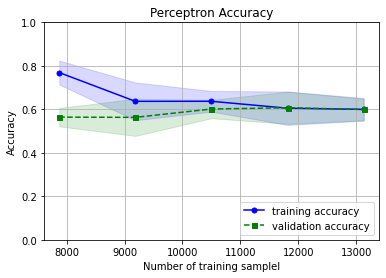

In [13]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores =learning_curve(estimator=Perceptron(),
                                                       X=X_train_dataset,
                                                       y=Y_train_dataset,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samplel')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Perceptron Accuracy")
plt.ylim([0.0,1.0])
plt.show()

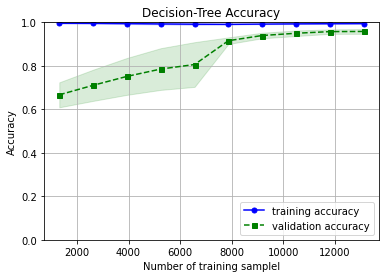

In [14]:
from sklearn.tree import DecisionTreeClassifier
train_sizes, train_scores, test_scores =learning_curve(estimator=DecisionTreeClassifier(),
                                                       X=X_train_dataset,
                                                       y=Y_train_dataset,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samplel')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Decision-Tree Accuracy")
plt.ylim([0.0,1.0])
plt.show()

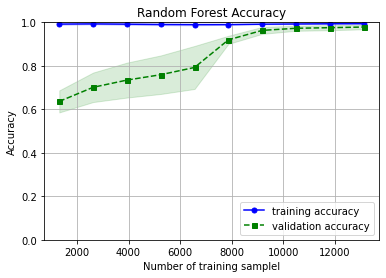

In [15]:
from sklearn.ensemble import RandomForestClassifier
train_sizes, train_scores, test_scores =learning_curve(estimator=RandomForestClassifier(n_estimators=15),
                                                       X=X_train_dataset,
                                                       y=Y_train_dataset,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samplel')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("Random Forest Accuracy")
plt.ylim([0.0,1.0])
plt.show()

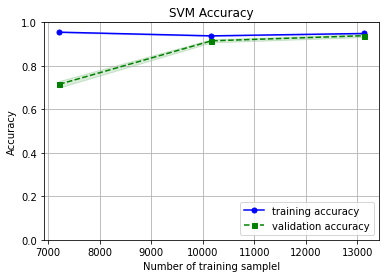

In [16]:
from sklearn.svm import SVC
train_sizes, train_scores, test_scores =learning_curve(estimator=SVC(kernel='rbf',C=1.0,random_state=0, gamma=2),
                                                       X=X_train_dataset,
                                                       y=Y_train_dataset,
                                                       cv=10,
                                                       n_jobs=1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')
plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',markersize=5,label='validation accuracy')
plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samplel')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title("SVM Accuracy")
plt.ylim([0.0,1.0])
plt.show()


### Hyper parameter tuning

In [17]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

| Parameter | Descriprtion |
| --- | --- | 
| Bootrstap | Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.|
| ccp_alpha | Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than will be chosen.|
| class_weight |Weights associated with classes in the form . If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y|
| criterion |The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain|
| max_depth |The maximum depth of the tree|
| max_features |The number of features to consider when looking for the best split|
| max_leaf_nodes |Grow trees with in best-first fashion. Best nodes are defined as relative reduction in impurity.|
| max_samples ||
| min_impurity_decrease |A node will be split if this split induces a decrease of the impurity greater than or equal to this value|
| min_samples_leaf |The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least training samples in each of the left and right branches|
| min_samples_split |The minimum number of samples required to split an internal node|
| min_weight_fraction_leaf |The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.|
| n_estimators |The number of trees in the forest|
| n_jobs |The number of jobs to run in parallel|
| oob_score |Whether to use out-of-bag samples to estimate the generalization score|
| random_state |Controls both the randomness of the bootstrapping of the samples used when building trees (if ) and the sampling of the features to consider when looking for the best split at each node (if ).|
| verbose |Controls the verbosity when fitting and predicting|
| warm_start |When set to , reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest|

### Evalutation


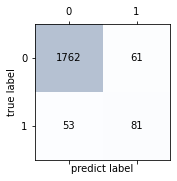

In [25]:
from sklearn.metrics import confusion_matrix

test_set_copy=test_set.copy()
test_dataset=test_set.drop(['id','nameProject','testCase','isFlaky'],axis=1)
test_dataset_lable=test_set['isFlaky']
test_dataset_lable=test_dataset_lable.astype(int)
X_test_dataset=sc.transform(test_dataset)
principalCompontent=pca.transform(X_test_dataset)
pca_test_dataset=pandas.DataFrame(principalCompontent,columns=['Principal Component 1','Principal Component 2','Principal Component  3',
                                                                'Principal Component 4','Principal Component 5','Principal Component 6',
                                                                'Principal Component 7','Principal Component 8','Principal Component 9',

                                                                'Principal Component 10'])
randomForest=RandomForestClassifier(n_estimators=40)
randomForest.fit(X_train_dataset,Y_train_dataset)
test_predict=randomForest.predict(pca_test_dataset)
confmat=confusion_matrix(y_true=test_dataset_lable,y_pred=test_predict)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predict label')
plt.ylabel('true label')
plt.show()

In [21]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
print("Accuracy: %.3f" %accuracy_score(y_true=test_dataset_lable,y_pred=test_predict))
print("Precision: %.3f" %precision_score(y_true=test_dataset_lable,y_pred=test_predict))
print("Recall: %.3f" %recall_score(y_true=test_dataset_lable,y_pred=test_predict))
print("F1: %.3f" %f1_score(y_true=test_dataset_lable,y_pred=test_predict))

Accuracy: 0.942
Precision: 0.575
Recall: 0.575
F1: 0.575
